# Player evaluation

Here we compare players based on their adjusted points. Also, we calculate some useful metrics using the adjusted points to further evaluate player performance in FPL.

In [1]:
# recent gameweek
gameweek = 10

In [2]:
# import basic libraries
import pandas as pd
import numpy as np
import requests
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pd.set_option('max_columns',100)

In [3]:
# fetch FPL data
filepath = '../data/fpl/data_week' + str(gameweek) + '.csv'
df = pd.read_csv(filepath, index_col=0)

# fetch team data
filepath = '../data/fbref/team_stats_week' + str(gameweek) + '.csv'
teamStats = pd.read_csv(filepath, index_col=0)

# fetch player stats data
filepath = '../data/fbref/player_stats_week' + str(gameweek) + '.csv'
playerStats = pd.read_csv(filepath, index_col=0, skiprows=1)

## Value and value points

Here we calculate two interesting metrics: 'value' and 'value points'. 

Value is simply adjusted points per game divided by the cost of the player. Essentially, this measures how many 'points per pound(/euro/whatever)' has the player gained on an average game week. 

The value points is calculated as the geometric mean of a players adjusted points per game and value. Essentially, in FPL we want to gain the maximum possible amount of points. However, we are restrained by a limited budget, so that in practice we cannot just pick all the best players. Then, we would like to have a squad of players that give the most points given our budget. Thus, we would like to pick players that have high value ('bang for buck'). However, often the players with highest value are very cheap players who somewhat overperform relative to their price. Picking a squad full of these players might leave a part of our budget unused. Calculating the geometric mean of adjusted points and value allows us to weigh both aspects equally, i.e. we want players that both gain a lot of points but also have good value. For example, this metric values equally two players, where one has twice the points per game of the other who in turn has twice the value of the other.

In [4]:
# value = expected points / cost
df['value'] = df['adjusted points per game'] / (df['now_cost'] / 10.0)
df['value form 5'] = df['form 5'] / (df['now_cost'] / 10.0)
df['value form 10'] = df['form 10'] / (df['now_cost'] / 10.0)
# geometric mean of 'adjusted points per game' and 'value'
df['valuePoints metric'] = np.sqrt(df['adjusted points per game'] * df['value'])

In [5]:
df['value_next10']  = df['xPoints_next10'] / (df['now_cost'] / 10.0)

In [6]:
df['xG+xA'] = df['xG'] + df['xA']
df['xG+xA per game'] = df['xG+xA'] / df['games played']

In [7]:
goalkeepers = df['element_type'] == 1
defenders = df['element_type'] == 2
midfielders = df['element_type'] == 3
forwards = df['element_type'] == 4

minGames = df['games played'] >= 3

## Player evaluation

Below we compile lists for each position sorting players based on a given metric.

Notice that 'next1_xP' is currently based on preseason expectations on average player performance!

In [8]:
metric = 'valuePoints metric'
#metric = 'adjusted points per game'
#metric = 'next1_xP'

numberToShow = 40

print('GOALKEEPERS')
display(df[goalkeepers & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'xPoints_next10', 'valuePoints metric']].head(20))
print('DEFENDERS')
display(df[defenders & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'xPoints_next10','valuePoints metric']].head(numberToShow))
print('MIDFIELDERS')
display(df[midfielders & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'xPoints_next10','valuePoints metric']].head(numberToShow))
print('FORWARDS')
display(df[forwards & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'xPoints_next10','valuePoints metric']].head(numberToShow))

GOALKEEPERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
475,Sá,Wolves,50,10.0,38,42.762150,3.8,4.276215,5.351245,38.917342,1.912381
559,Ramsdale,Arsenal,47,7.0,39,28.709917,5.6,4.101417,4.442497,38.884524,1.891842
146,Guaita,Crystal Palace,45,10.0,37,38.182358,3.7,3.818236,3.966253,39.619841,1.799934
30,Martínez,Aston Villa,55,9.0,42,37.341322,4.7,4.149036,4.666615,36.646226,1.769155
143,Mendy,Chelsea,62,9.0,51,39.597759,5.7,4.399751,4.438453,41.895573,1.766983
80,Raya,Brentford,45,9.0,34,33.629197,3.8,3.736577,3.629176,40.020293,1.761440
353,Lloris,Tottenham,54,10.0,40,40.401272,4.0,4.040127,3.660997,37.849017,1.738594
270,de Gea,Manchester Utd,50,10.0,37,37.575244,3.7,3.757524,2.774896,40.558399,1.680416
408,Fabianski,West Ham,50,10.0,35,37.423798,3.5,3.742380,4.416956,40.741464,1.673643


DEFENDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
135,Chilwell,Chelsea,60,4.0,43,23.699004,10.8,5.924751,6.640383,46.965316,2.418769
237,Alexander-Arnold,Liverpool,76,8.0,52,50.153953,6.5,6.269244,4.454851,57.695234,2.274094
256,Cancelo,Manchester City,64,10.0,53,55.026557,5.3,5.502656,4.847043,39.535521,2.175116
122,Alonso,Chelsea,56,6.0,39,30.369506,6.5,5.061584,2.330734,43.493641,2.138910
527,Chalobah,Chelsea,49,6.0,44,27.398506,7.3,4.566418,5.832753,43.263944,2.062897
142,James,Chelsea,58,7.0,56,34.640257,8.0,4.948608,4.895656,45.851034,2.054798
245,Tsimikas,Liverpool,39,5.0,24,19.596596,4.8,3.919319,1.000000,31.791950,1.984624
258,Aké,Manchester City,48,3.0,14,12.925367,4.7,4.308456,3.471518,34.091748,1.966532
76,Jansson,Brentford,47,10.0,42,41.934330,4.2,4.193433,3.860383,38.214153,1.934286


MIDFIELDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
268,Torres,Manchester City,67,4.0,26,25.179456,6.5,6.294864,NaN,35.284907,2.431918
233,Salah,Liverpool,129,10.0,112,87.179798,11.2,8.717980,9.085794,62.527959,2.427286
265,Foden,Manchester City,82,6.0,37,35.804683,6.2,5.967447,6.706611,41.909856,2.083923
250,Gündogan,Manchester City,72,6.0,29,33.462683,4.8,5.577114,9.646597,44.505419,2.078468
138,Mount,Chelsea,76,7.0,41,38.082564,5.9,5.440366,7.091946,53.148026,1.973428
96,Mbeumo,Brentford,56,9.0,30,42.007299,3.3,4.667478,4.483145,40.409558,1.972369
144,Gallagher,Crystal Palace,57,9.0,51,42.350031,5.7,4.705559,4.179963,40.606637,1.970942
420,Bowen,West Ham,63,10.0,46,48.889949,4.6,4.888995,5.646839,42.246120,1.947822
419,Benrahma,West Ham,64,10.0,55,48.318949,5.5,4.831895,4.078439,42.899769,1.909974


FORWARDS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
177,Calvert-Lewin,Everton,80,3.0,23,25.540,7.7,8.513333,NaN,45.882426,3.009918
413,Antonio,West Ham,82,9.0,59,54.404,6.6,6.044889,5.280000,57.513568,2.110967
468,King,Watford,56,8.0,38,37.613,4.8,4.701625,5.817750,42.150867,1.986799
189,Bamford,Leeds United,77,5.0,21,26.342,4.2,5.268400,NaN,38.570886,1.898600
583,Hwang,Wolves,58,7.0,36,30.700,5.1,4.385714,4.420000,45.105358,1.821069
263,Jesus,Manchester City,87,9.0,48,46.055,5.3,5.117222,4.910500,39.122887,1.734901
78,Toney,Brentford,67,10.0,37,42.962,3.7,4.296200,3.594200,39.573223,1.659767
307,Saint-Maximin,Newcastle Utd,68,10.0,43,42.813,4.3,4.281300,4.234200,38.051050,1.641804
529,Lukaku,Chelsea,115,7.0,31,37.100,4.4,5.300000,3.633333,51.186123,1.562885


Below we compile a list sorting players based on a given metric (irrespective of position).

In [9]:
metric = 'adjusted points per game'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game','xPoints_next10',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,xPoints_next10,valuePoints metric
id,,,,,,,,,,
233,Salah,Liverpool,129,10.0,112,87.179798,11.2,8.717980,62.527959,2.427286
177,Calvert-Lewin,Everton,80,3.0,23,25.540000,7.7,8.513333,45.882426,3.009918
268,Torres,Manchester City,67,4.0,26,25.179456,6.5,6.294864,35.284907,2.431918
237,Alexander-Arnold,Liverpool,76,8.0,52,50.153953,6.5,6.269244,57.695234,2.274094
413,Antonio,West Ham,82,9.0,59,54.404000,6.6,6.044889,57.513568,2.110967
265,Foden,Manchester City,82,6.0,37,35.804683,6.2,5.967447,41.909856,2.083923
135,Chilwell,Chelsea,60,4.0,43,23.699004,10.8,5.924751,46.965316,2.418769
253,Mendy,Manchester City,53,1.0,3,5.808456,3.0,5.808456,36.106383,2.523032
230,Mané,Liverpool,119,10.0,57,57.833798,5.7,5.783380,48.188009,1.676518


In [10]:
metric = 'valuePoints metric'

display(df[minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','xPoints_next10',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,xPoints_next10,valuePoints metric
id,,,,,,,,,
177,Calvert-Lewin,Everton,80,3.0,7.7,8.513333,NaN,45.882426,3.009918
268,Torres,Manchester City,67,4.0,6.5,6.294864,NaN,35.284907,2.431918
233,Salah,Liverpool,129,10.0,11.2,8.717980,9.085794,62.527959,2.427286
135,Chilwell,Chelsea,60,4.0,10.8,5.924751,6.640383,46.965316,2.418769
237,Alexander-Arnold,Liverpool,76,8.0,6.5,6.269244,4.454851,57.695234,2.274094
256,Cancelo,Manchester City,64,10.0,5.3,5.502656,4.847043,39.535521,2.175116
122,Alonso,Chelsea,56,6.0,6.5,5.061584,2.330734,43.493641,2.138910
413,Antonio,West Ham,82,9.0,6.6,6.044889,5.280000,57.513568,2.110967
265,Foden,Manchester City,82,6.0,6.2,5.967447,6.706611,41.909856,2.083923


In [11]:
metric = 'form 10'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 10',\
                                                        'xPoints_next10','valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 10,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
177,Calvert-Lewin,Everton,80,3.0,23,25.540000,7.7,8.513333,8.833333,45.882426,3.009918
233,Salah,Liverpool,129,10.0,112,87.179798,11.2,8.717980,8.791358,62.527959,2.427286
135,Chilwell,Chelsea,60,4.0,43,23.699004,10.8,5.924751,6.640383,46.965316,2.418769
237,Alexander-Arnold,Liverpool,76,8.0,52,50.153953,6.5,6.269244,6.352697,57.695234,2.274094
268,Torres,Manchester City,67,4.0,26,25.179456,6.5,6.294864,6.325634,35.284907,2.431918
413,Antonio,West Ham,82,9.0,59,54.404000,6.6,6.044889,6.044889,57.513568,2.110967
265,Foden,Manchester City,82,6.0,37,35.804683,6.2,5.967447,5.838842,41.909856,2.083923
230,Mané,Liverpool,119,10.0,57,57.833798,5.7,5.783380,5.786445,48.188009,1.676518
256,Cancelo,Manchester City,64,10.0,53,55.026557,5.3,5.502656,5.711364,39.535521,2.175116


In [12]:
metric = f'gameweek {gameweek+1} prediction'
#metric = f'xPoints_next10'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game',metric,\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,gameweek 11 prediction,valuePoints metric
id,,,,,,,,,,
138,Mount,Chelsea,76,7.0,41,38.082564,5.9,5.440366,5.660102,1.973428
529,Lukaku,Chelsea,115,7.0,31,37.100000,4.4,5.300000,5.375787,1.562885
233,Salah,Liverpool,129,10.0,112,87.179798,11.2,8.717980,5.262959,2.427286
142,James,Chelsea,58,7.0,56,34.640257,8.0,4.948608,4.946689,2.054798
119,Azpilicueta,Chelsea,60,8.0,42,35.611008,5.2,4.451376,4.901467,1.817267
135,Chilwell,Chelsea,60,4.0,43,23.699004,10.8,5.924751,4.889447,2.418769
413,Antonio,West Ham,82,9.0,59,54.404000,6.6,6.044889,4.881197,2.110967
205,Vardy,Leicester City,108,10.0,58,49.971000,5.8,4.997100,4.811945,1.520569
237,Alexander-Arnold,Liverpool,76,8.0,52,50.153953,6.5,6.269244,4.809210,2.274094


In [13]:
metric = 'xG'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game',\
                      'valuePoints metric', 'xG', 'xA', 'xG+xA', 'xG+xA per game']].head(numberToShow))

,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,valuePoints metric,xG,xA,xG+xA,xG+xA per game
id,,,,,,,,,,,
230,Mané,Liverpool,119,10.0,5.7,5.783380,1.676518,6.3,1.1,7.4,0.740000
233,Salah,Liverpool,129,10.0,11.2,8.717980,2.427286,6.1,4.5,10.6,1.060000
413,Antonio,West Ham,82,9.0,6.6,6.044889,2.110967,5.1,2.8,7.9,0.877778
205,Vardy,Leicester City,108,10.0,5.8,4.997100,1.520569,4.8,1.0,5.8,0.580000
240,Jota,Liverpool,75,9.0,4.9,5.178613,1.890962,4.2,2.3,6.5,0.722222
96,Mbeumo,Brentford,56,9.0,3.3,4.667478,1.972369,4.0,0.7,4.7,0.522222
228,Firmino,Liverpool,89,8.0,4.4,4.346375,1.456908,3.9,0.8,4.7,0.587500
177,Calvert-Lewin,Everton,80,3.0,7.7,8.513333,3.009918,3.8,0.1,3.9,1.300000
579,Ronaldo,Manchester Utd,124,7.0,5.3,4.938714,1.402501,3.5,0.6,4.1,0.585714


## Player Visualizations

In [14]:
game_weeks = np.arange(1,gameweek+1)
column_xPoints = []
column_xG = []
column_xA = []
column_xGA = []
for i in range(1,gameweek+1):
    column_xPoints.append('xPoints week ' + str(i))
    column_xG.append('xG_week' + str(i))
    column_xA.append('xA_week' + str(i))
    column_xGA.append('xGA_week' + str(i))

#display(game_weeks)
#display(column_xPoints)

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,gameweek 11 prediction,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
265,Foden,Manchester City,82,6.0,37,35.804683,6.2,5.967447,4.299398,41.909856,2.083923


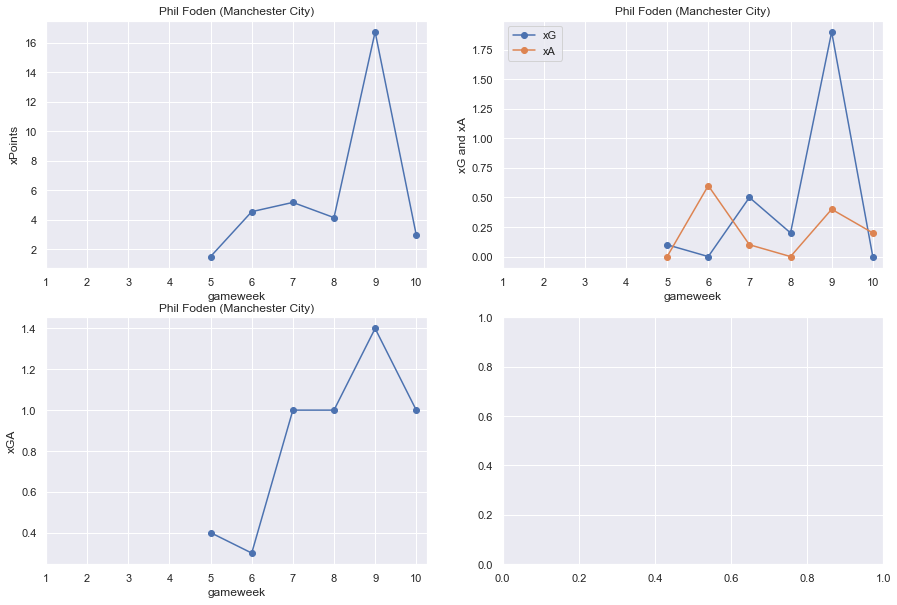

In [15]:
# find player index
name_string = 'Foden'
playersFound = df[df['web_name'].str.contains(name_string)]
display(playersFound[['web_name','team_name','now_cost','games played','total_points','adjusted points',\
                      'points_per_game','adjusted points per game',f'gameweek {gameweek+1} prediction',\
                      'xPoints_next10', 'valuePoints metric']])
# plot xPoints over time
ix = playersFound.index[0]
#ix = 468

fig,ax = plt.subplots(2,2,figsize=(15,10))

ax[0,0].plot(game_weeks, df.loc[ix,column_xPoints], marker='o')
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[0,0].set_title(title_string)
ax[0,0].set_xlabel('gameweek')
ax[0,0].set_ylabel('xPoints')
ax[0,0].set_xticks(game_weeks)

ax[0,1].plot(game_weeks, df.loc[ix,column_xG], marker='o')
ax[0,1].plot(game_weeks, df.loc[ix,column_xA], marker='o')
ax[0,1].legend(('xG','xA'))
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[0,1].set_title(title_string)
ax[0,1].set_xlabel('gameweek')
ax[0,1].set_ylabel('xG and xA')
ax[0,1].set_xticks(game_weeks)

ax[1,0].plot(game_weeks, df.loc[ix,column_xGA], marker='o')
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[1,0].set_title(title_string)
ax[1,0].set_xlabel('gameweek')
ax[1,0].set_ylabel('xGA')
ax[1,0].set_xticks(game_weeks)

plt.show()

## My team

In [16]:
session = requests.session()

In [17]:
filepath = Path('../../../access_control/FPL_access.txt')
with open(filepath) as file:
    text = file.read().splitlines()
    email = text[0]
    password = text[1]

In [18]:
url = 'https://users.premierleague.com/accounts/login/'

payload = {
'password': password,
'login': email,
'redirect_uri': 'https://fantasy.premierleague.com/a/login', 'app': 'plfpl-web'
}
session.post(url, data=payload)

<Response [200]>

In [19]:
response = session.get('https://fantasy.premierleague.com/api/my-team/3202682')
team = response.json()['picks']

In [20]:
my_player_ix = [player['element'] for player in team]
my_starting11 = my_player_ix[:-4]
my_subs = my_player_ix[-4:]

In [21]:
exp_avg = df.loc[my_starting11,'adjusted points per game'].sum() + \
                df.loc[my_starting11,'adjusted points per game'].max()
exp_next = df.loc[my_starting11, f'gameweek {gameweek+1} prediction'].sum() + \
                df.loc[my_starting11,f'gameweek {gameweek+1} prediction'].max()

print('STARTING 11')
print('Expected points on average: ' + str(exp_avg))
print('Predicted points next gameweek: ' + str(exp_next))
display(df.loc[my_starting11, ['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','form 10', \
           f'gameweek {gameweek+1} prediction','xPoints_next10', 'valuePoints metric']].head(numberToShow))
print('\nSUBSTITUTES')
display(df.loc[my_subs, ['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','form 10', \
         f'gameweek {gameweek+1} prediction', 'xPoints_next10', 'valuePoints metric']].head(numberToShow))

STARTING 11
Expected points on average: 68.63067375365893
Predicted points next gameweek: 53.96221613883972


,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,form 10,gameweek 11 prediction,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
559,Ramsdale,Arsenal,47,7.0,5.6,4.101417,4.442497,4.629086,4.224933,38.884524,1.891842
256,Cancelo,Manchester City,64,10.0,5.3,5.502656,4.847043,5.711364,4.038923,39.535521,2.175116
237,Alexander-Arnold,Liverpool,76,8.0,6.5,6.269244,4.454851,6.352697,4.809210,57.695234,2.274094
142,James,Chelsea,58,7.0,8.0,4.948608,4.895656,5.335881,4.946689,45.851034,2.054798
144,Gallagher,Crystal Palace,57,9.0,5.7,4.705559,4.179963,4.791610,3.647271,40.606637,1.970942
196,Raphinha,Leeds United,66,9.0,4.6,4.536494,4.915159,4.593741,4.028445,37.363895,1.765828
233,Salah,Liverpool,129,10.0,11.2,8.717980,9.085794,8.791358,5.262959,62.527959,2.427286
265,Foden,Manchester City,82,6.0,6.2,5.967447,6.706611,5.838842,4.299398,41.909856,2.083923
413,Antonio,West Ham,82,9.0,6.6,6.044889,5.280000,6.044889,4.881197,57.513568,2.110967



SUBSTITUTES


,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,form 10,gameweek 11 prediction,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
376,Foster,Watford,41,6.0,2.0,2.616495,2.208241,2.585454,3.931629,36.982990,1.292195
491,Livramento,Southampton,45,10.0,4.2,3.383414,4.348964,3.751333,3.852534,34.424391,1.594957
302,Manquillo,Newcastle Utd,40,7.0,2.9,2.402075,2.410211,2.619640,2.998431,27.689678,1.201037
115,Brownhill,Burnley,44,10.0,1.7,2.164381,2.456216,2.222892,2.158491,25.586310,1.031828


## Save data

In [22]:
# save data
filepath = '../data/fpl/data_week' + str(gameweek) + str('.csv')
df.to_csv(filepath)